In [1]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datasets

In [3]:
train_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
train_data.shape

(14731, 22)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [7]:
train_data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

# Data Preprocessing

In [8]:
train_data['Made_Purchase'] = train_data['Made_Purchase'].replace(to_replace = ['false','true'], value = [0,1])

In [9]:
for i in train_data.select_dtypes(include = 'object').columns:
    print(i, pd.unique(train_data[i]))
    print('\n')

Month_SeasonalPurchase ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]


CustomerType ['Returning_Visitor' 'New_Visitor' 'Other' nan]


Gender ['Not Specified' 'Female' 'Male' nan]


Cookies Setting ['Deny' 'ALL' 'Required' nan]


Education ['Not Specified' 'Others' 'Diploma' 'Graduate' nan]


Marital Status ['Other' 'Married' 'Single' nan]




In [10]:
train_data.select_dtypes(include = 'float64').describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


# Data Visualization

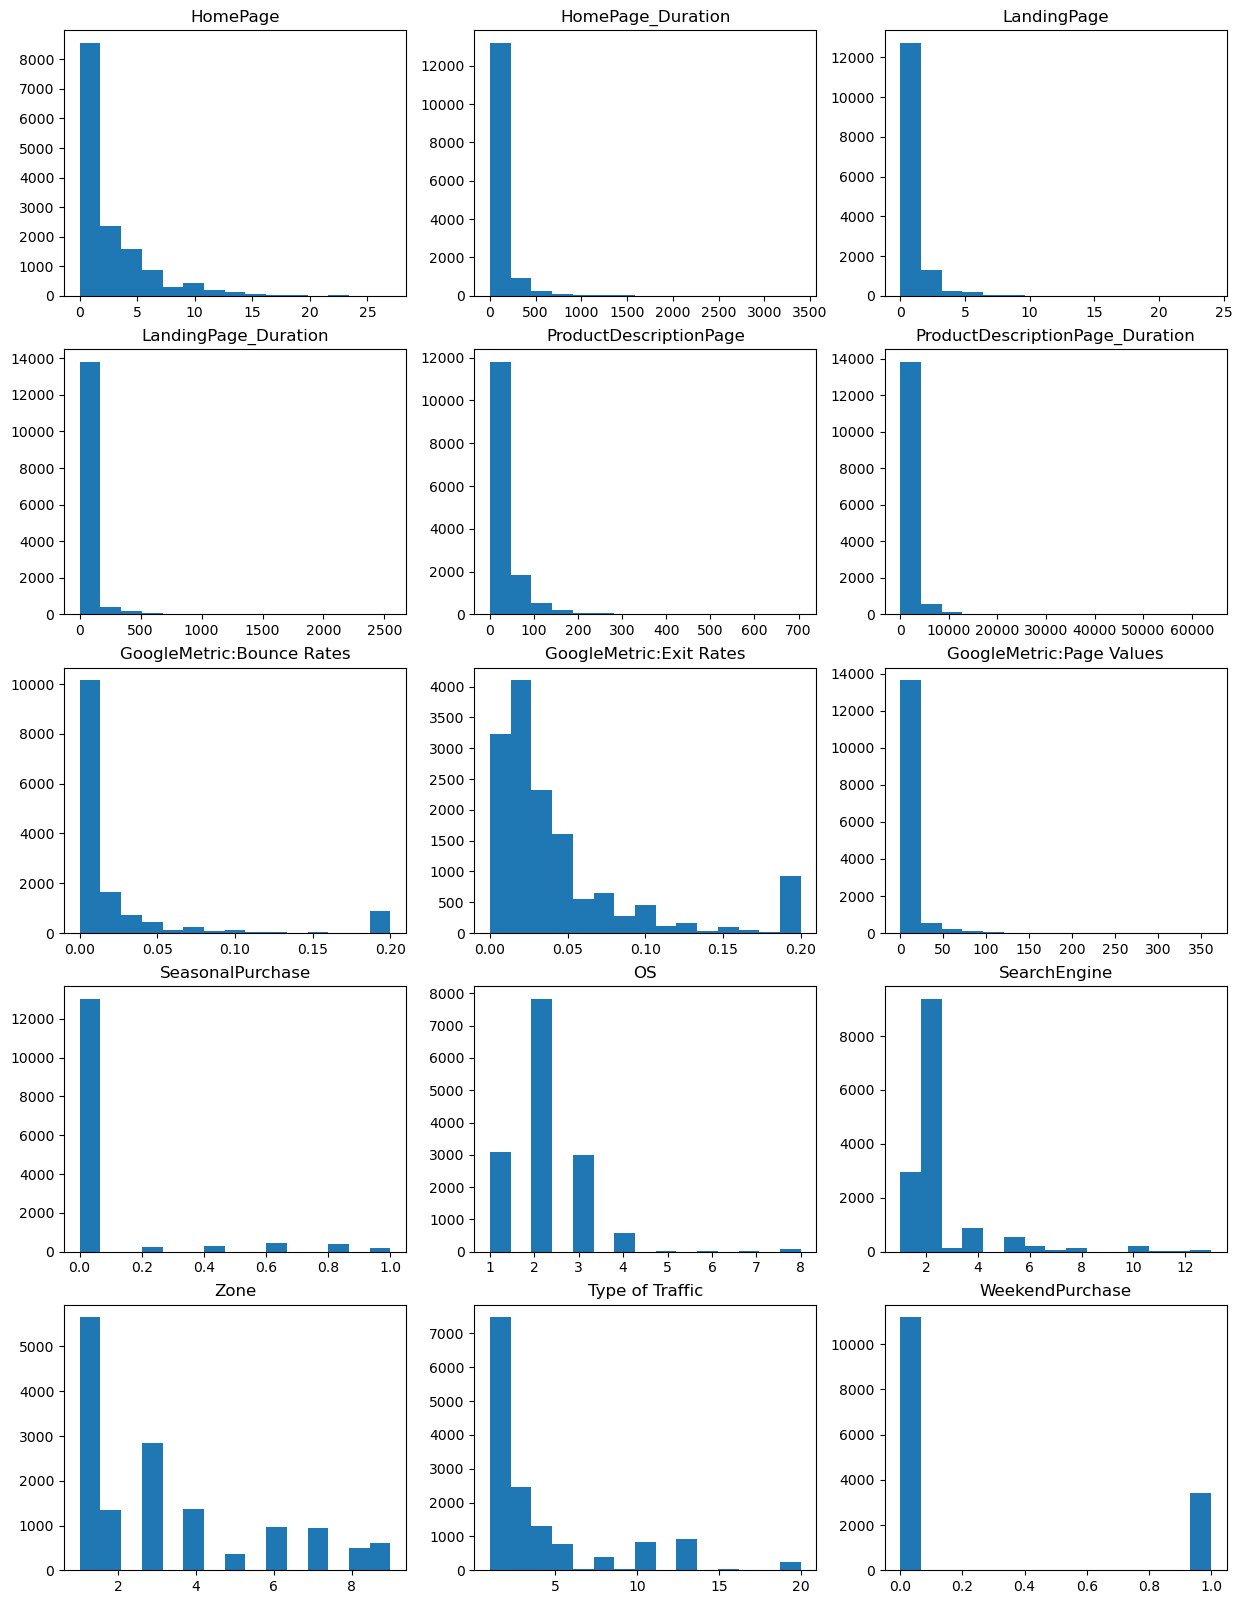

In [11]:
numeric_features = train_data.select_dtypes(include = 'float64').columns
plt.figure(figsize = (15, 20))
for i in range(len(numeric_features)):
        plt.subplot(5 ,3 , i+1)
        plt.hist(train_data[numeric_features[i]], bins = 15)
        plt.title(numeric_features[i])
plt.show()

# Data Transformation

In [12]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
columns = (train_data.columns).tolist()
columns = columns[:-1]

In [14]:
one_hot_columns = ['Month_SeasonalPurchase', 'CustomerType', 'Gender', "Cookies Setting", 'Education', 'Marital Status']

In [15]:
trans = ColumnTransformer([('nominal_columns', OneHotEncoder(handle_unknown = 'ignore', sparse = False), one_hot_columns)], remainder = 'passthrough')

In [16]:
impute = SimpleImputer(strategy = 'most_frequent')

In [17]:
data_preprocessor = Pipeline(
    steps = [
        ('column_transformer', trans),
        ('r_scaler', RobustScaler()),
        ('s_scaler', MinMaxScaler()),
    ])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data.iloc[:,0:21], train_data.iloc[:,-1], test_size = 0.2, random_state = 42)

In [19]:
X_train = impute.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = columns)

X_test = impute.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = columns)

X_train = data_preprocessor.fit_transform(X_train, y_train)
X_test = data_preprocessor.transform(X_test)

# Model Training

In [20]:
from sklearn.metrics import f1_score

In [21]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average='micro'))

0.6844248388191381


# Hyper-parameter Tuning


In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits = 6, test_size = 0.3, random_state = 42)

grid_params = {'n_estimators': [100, 200, 300, 400, 500, 600],
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

tune = RandomizedSearchCV(estimator = model, param_distributions = grid_params, scoring = 'f1_micro', cv = cv, n_jobs = -1)
tune.fit(X_train, y_train)
tune.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [23]:
model = tune.best_estimator_
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred, average = 'micro'))

0.6857821513403461


In [24]:
test_data = impute.fit_transform(test_data)
test_data = pd.DataFrame(test_data, columns = columns)
X_test = data_preprocessor.transform(test_data)
Prediction = model.predict(X_test)

# Exporting CSV

In [25]:
id = np.arange(0,6599,1)
final_prediction = pd.DataFrame({'id': id, 'Made_Purchase': Prediction})
final_prediction['Made_Purchase'] = final_prediction['Made_Purchase'].replace(to_replace = [0,1], value = ['false','true'])
final_prediction.to_csv('MLP Project 21f2000448.csv', index = False)